# Project: Investigating 'No Show Appointments' Dataset

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#limitation_of_study"> Limitation of Study</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is investigating the No Show Appointments dataset from <a href='https://www.kaggle.com/datasets/joniarroba/noshowappointments'>Kaggle</a>. It is a dataset of 100,000 (100K) medical appointments in Brazil that is focused on the question of whether or not patients show up for their appointment.

The questions we would answer in this data analysis include:
1. The number of Brazillians keeping to their appointment and those not keeping to their appointment, which is greater?
2. Patients who received sms and those who didn't which is greater?
3. Brazillians on the Brasilian welfare program and those not on it, which is greater?
4. How many patients at a particular neighbourhood hospital kept to their appointment and how many failed to keep to their appointment?
5. Which Neighbourhood has none of the patients keeping to their appointment?
6. What gender of patients kept to their appointment most?
7. Population of female patients compared to male patients which is greater?
8. Are patients on Brasilian Welfare Programme (Bolsa Familia) keeping to their appointment more than patients who aren't on the welfare programe?
9. Does the hipertension, diabetes and alcoholism status of patients affect their keeping to their appointments?
10. What is the mean age of Brazillian patients?

Below is a brief description of the fields of the dataset:


**PatientId:**
It bears the id of the patient.

**Gender:**
It bears the gender of the patient.

**ScheduledDay:**
It bears the day the patient called for the appointment.

**AppointmentDay:**
It bears the day the patient is to visit the hospital for their appointment.

**Age:**
It bears the age of the patient.

**Neighbourhood:**
It bears the location of the hospital where the appointment was scheduled.

**Scholarship:**
It bears the status of the patient as regarding if the patient is on Brasilian welfare program (Bolsa Familia).

**Hipertension:**
It bears the hipertensive status of the patient.

**Diabetes**
It bears the diabetic status of the patient.

**Alcoholism**
It bears the alcoholic status of the patient.

**Handcap**
It bears the handicap status of the patient.

**SMS_received**
It shows if the patient received an sms about their appointment or not.

**No-show**
It bears 'no' if the patient visited and 'yes' if the patient did not visit.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

We will first all load our data and inspect the head and tail to see if we have null entries that we need to clean up in the cleaning section.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.tail(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110507,4.769460e+14,5786918,F,2016-06-08T09:04:18Z,2016-06-08T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
110508,9.433650e+13,5757656,F,2016-06-01T09:41:00Z,2016-06-01T00:00:00Z,59,MARIA ORTIZ,0,0,0,0,0,0,No
110509,4.952970e+14,5786750,M,2016-06-08T08:50:51Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,0,0,0,0,0,No
110510,2.362180e+13,5757587,F,2016-06-01T09:35:48Z,2016-06-01T00:00:00Z,64,SOLON BORGES,0,0,0,0,0,0,No
110511,8.236000e+11,5786742,F,2016-06-08T08:50:20Z,2016-06-08T00:00:00Z,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,9.876250e+13,5786368,F,2016-06-08T08:20:01Z,2016-06-08T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674780e+13,5785964,M,2016-06-08T07:52:55Z,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2.695690e+12,5786567,F,2016-06-08T08:35:31Z,2016-06-08T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,0,No
110515,6.456340e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110516,6.923770e+13,5780205,F,2016-06-07T07:45:16Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,0,0,0,0,0,Yes


As we can see from the tail inspected, we have a zero age, so we count the number of zeros in our age column. We can also have negative age, so we inspect that as well.

In [7]:
count = (df['Age'] < 0).sum()
print(count)

1


In [8]:
#column = df['Age']
#count = column[column==0].count()
count = df['Age'].value_counts()[0]
print(count)

3539


We have 3,539 entries in our age column that are zeros and 1 entry which is less than 0, i.e. a negative value. Next, we find the number of rows and columns of dataset we are dealing with.

In [9]:
df.shape[0]


110527

In [10]:
df.shape[1]

14

PatientId is displaying in exponential form, we inspect the data type to see if we need to clean it and make it to be in a more user-friendly format.

In [11]:
type(df['PatientId'][0])

numpy.float64

In [12]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

We will likely make PatientId to become an string, so that the values displayed would be more user-friendly.

In [13]:
df.info

<bound method DataFrame.info of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841190e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572130e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596270e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557660e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213490e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775120e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-

Next we check if our data contains null values.


In [14]:
df.columns[df.isnull().any()].tolist()

[]

There are no null values.

We also need to clean our column names to have similar formats. Our column names will become: patient_id, appointment_id, gender, scheduled_day, appointment_day, age, neighbourhood, scholarship, hipertension, diabetes, alcoholism, handicap, sms_received, no_show respectively.

Next we check if we have data duplicates.

In [15]:
sum(df.duplicated())

0

As we can see there are no data duplicates.

### Data Cleaning

In [16]:
#changing our column names
labels=['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df_new = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', names=labels, header=0)
df_new.head(20)


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [17]:
#Changig the data type of PatientId
df_new['patient_id'] = df_new['patient_id'].astype(str)
df_new.dtypes

patient_id         object
appointment_id      int64
gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handicap            int64
sms_received        int64
no_show            object
dtype: object

We replace our negative age with zero, before replacing all zero ages with the mean

In [18]:
df_new['age']=df_new['age'].mask(df_new['age'].lt(0),0)

We check if we still have a negative age

In [19]:
count = (df_new['age'] < 0).sum()
print(count)

0


We don't have a negative age anymore, so we replace all zero ages with the mean age

In [20]:
df_new['age'].replace(0, df_new['age'].mean(axis=0), inplace=True)

Next we check if we still have zero entries

In [21]:
count = (df_new['age'] == 0).sum()
print(count)

0


We inspect the tail to see if the zero age is gone from record 110507

In [22]:
df_new.tail(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
110507,476946000000000.0,5786918,F,2016-06-08T09:04:18Z,2016-06-08T00:00:00Z,37.088883,MARIA ORTIZ,0,0,0,0,0,0,No
110508,94336500000000.0,5757656,F,2016-06-01T09:41:00Z,2016-06-01T00:00:00Z,59.000000,MARIA ORTIZ,0,0,0,0,0,0,No
110509,495297000000000.0,5786750,M,2016-06-08T08:50:51Z,2016-06-08T00:00:00Z,33.000000,MARIA ORTIZ,0,0,0,0,0,0,No
110510,23621800000000.0,5757587,F,2016-06-01T09:35:48Z,2016-06-01T00:00:00Z,64.000000,SOLON BORGES,0,0,0,0,0,0,No
110511,823600000000.0,5786742,F,2016-06-08T08:50:20Z,2016-06-08T00:00:00Z,14.000000,MARIA ORTIZ,0,0,0,0,0,0,No
110512,98762500000000.0,5786368,F,2016-06-08T08:20:01Z,2016-06-08T00:00:00Z,41.000000,MARIA ORTIZ,0,0,0,0,0,0,No
110513,86747800000000.0,5785964,M,2016-06-08T07:52:55Z,2016-06-08T00:00:00Z,2.000000,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2695690000000.0,5786567,F,2016-06-08T08:35:31Z,2016-06-08T00:00:00Z,58.000000,MARIA ORTIZ,0,0,0,0,0,0,No
110515,645634000000000.0,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33.000000,MARIA ORTIZ,0,1,0,0,0,0,Yes
110516,69237700000000.0,5780205,F,2016-06-07T07:45:16Z,2016-06-08T00:00:00Z,37.000000,MARIA ORTIZ,0,0,0,0,0,0,Yes


The age is showing in decimals, so we do a round off so we have whole number ages.

In [23]:
df_new['age'].apply(np.ceil)

0         62.0
1         56.0
2         62.0
3          8.0
4         56.0
          ... 
110522    56.0
110523    51.0
110524    21.0
110525    38.0
110526    54.0
Name: age, Length: 110527, dtype: float64

We still have age in decimal after the round off, we inspect the data type of age and see if we can make it an integer

In [24]:
df_new.dtypes

patient_id          object
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                float64
neighbourhood       object
scholarship          int64
hipertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
no_show             object
dtype: object

Age is a float, we change it to an integer

In [25]:
df_new['age'] = df_new['age'].astype('int')

We inspect the tail again.

In [26]:
df_new.tail(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
110507,476946000000000.0,5786918,F,2016-06-08T09:04:18Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,0,0,0,0,0,No
110508,94336500000000.0,5757656,F,2016-06-01T09:41:00Z,2016-06-01T00:00:00Z,59,MARIA ORTIZ,0,0,0,0,0,0,No
110509,495297000000000.0,5786750,M,2016-06-08T08:50:51Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,0,0,0,0,0,No
110510,23621800000000.0,5757587,F,2016-06-01T09:35:48Z,2016-06-01T00:00:00Z,64,SOLON BORGES,0,0,0,0,0,0,No
110511,823600000000.0,5786742,F,2016-06-08T08:50:20Z,2016-06-08T00:00:00Z,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,98762500000000.0,5786368,F,2016-06-08T08:20:01Z,2016-06-08T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,86747800000000.0,5785964,M,2016-06-08T07:52:55Z,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2695690000000.0,5786567,F,2016-06-08T08:35:31Z,2016-06-08T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,0,No
110515,645634000000000.0,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110516,69237700000000.0,5780205,F,2016-06-07T07:45:16Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,0,0,0,0,0,Yes


In [27]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Viewing our cleaned data
df_new.head(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872500000000.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000.0,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000.0,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841190000000.0,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985100000000.0,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688000000000.0,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449830000000.0,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394700000000.0,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124600000000.0,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
Let's explore each variable in our dataset individually using a box plot and the describe function before we go ahead to use the dataset to answer the above listed questions.

In [28]:
df_new.describe()

,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,38.273933,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,22.104720,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<AxesSubplot:>

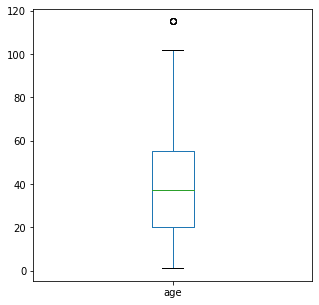

In [31]:
df_new['age'].plot(kind='box', figsize=(5,5))

The box plot for age is showing that age at the upper quartile varied but age at the lower quartile seems to lie within the same range and we have an outlier in the age column.

### The number of Brazillians keeping to their appointment and those not keeping to their appointment, which is greater?

To answer this question we will be using fields: no_show. We will plot a bar chart to visualize it.

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#df_new.hist(figsize=(8,8))
def bar_chart1(field, titl,xlab,ylab):
    df_new[field].value_counts().plot(kind='bar', title=titl,xlabel=xlab, ylabel=ylab)
bar_chart1('no_show',"Number of Brazillians keeping to their appointment and those not keeping to their appointment", "Answer","Count")


### Patients who received sms and those who didn't which is greater?

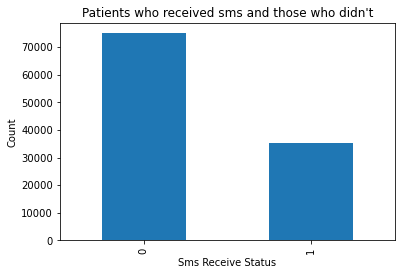

In [61]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#comparison of patients who received sms and those who didn't
bar_chart1('sms_received','Patients who received sms and those who didn\'t',"Sms Receive Status", "Count")

The bar chart above shows that Brazillian patients do not receive sms on their appointment at higher degree as can be seen majority (above 70,000) do not receive sms while minority(close to 40,000) receive sms.

### Brazillians on the Brasilian welfare program and those not on it, which is greater?

<AxesSubplot:title={'center':'Brazillians on the Brasilian welfare program and those not on it'}, ylabel='scholarship'>

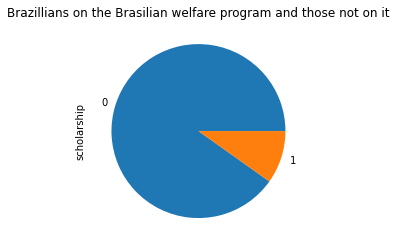

In [32]:
#comparison of number of patients on welfare program and those not on it
df_new['scholarship'].value_counts().plot(kind='pie', title="Brazillians on the Brasilian welfare program and those not on it")

Majority of Brazillians are not on the Bolsa Familia welfare programme.

### How many patients at a particular neighbourhood hospital kept to their appointment and how many failed to keep to their appointment?
To ascertain this, we will first of all create a sub dataframe using groupby function of all neighbourhood and their show_up status. And then we query the tail to know the total number of entries we have so that we divide by two when we are looping since each neighbourhood has a no_show of yes or no (see the data frame below)

In [38]:
#Creates a data frame of all neighbourhood with their no_show status of patients
df_patient_count1 = df_new.groupby(["neighbourhood","no_show"], as_index=False)["patient_id"].size()
# Queries the tail of the dataframe, so that we know how many times we are looping to create a visualization of the result
df_patient_count1.tail()

,neighbourhood,no_show,size
155,TABUAZEIRO,Yes,573
156,UNIVERSITÁRIO,No,120
157,UNIVERSITÁRIO,Yes,32
158,VILA RUBIM,No,710
159,VILA RUBIM,Yes,141


Next, we create our loop, which will loop for 160/2 times since each neighbourhood hospital has Yes or No count

C:\Users\OPARA FEBECHUKWU C\miniconda3\envs\python3_6\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


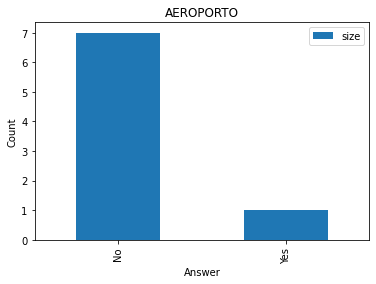

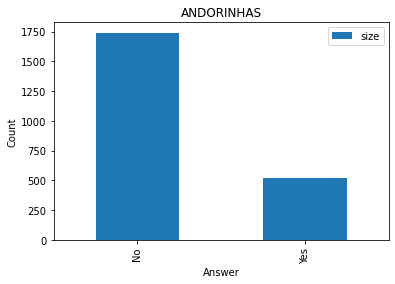

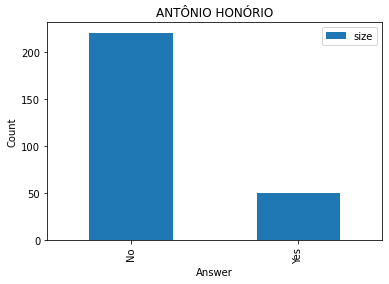

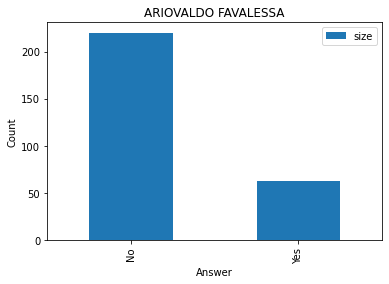

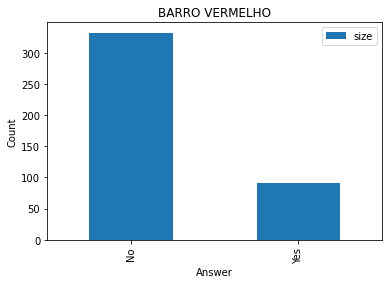

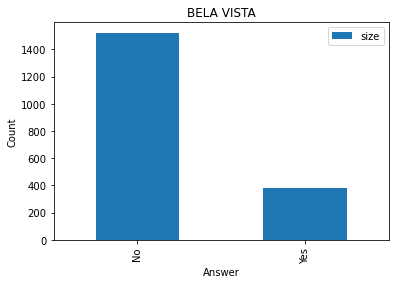

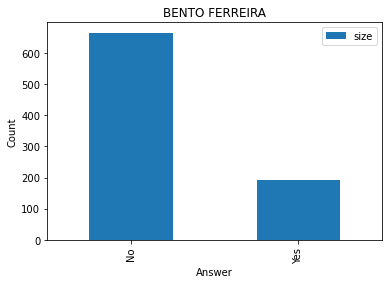

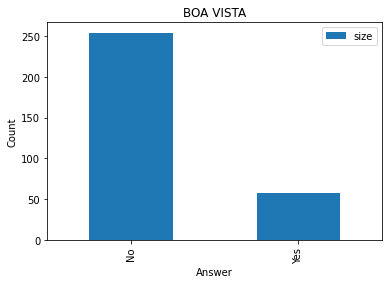

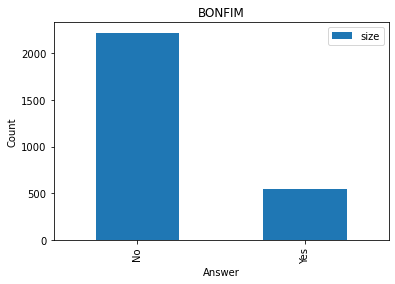

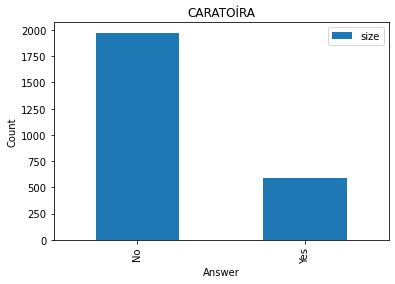

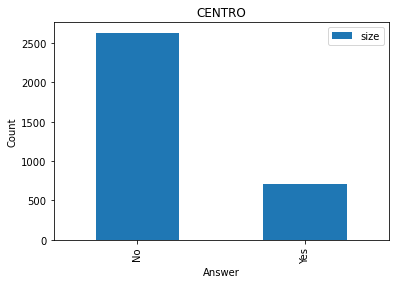

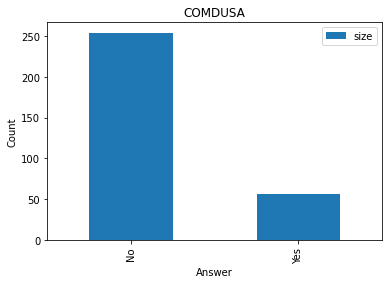

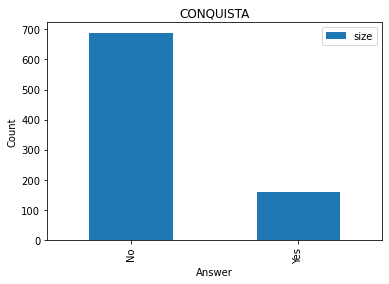

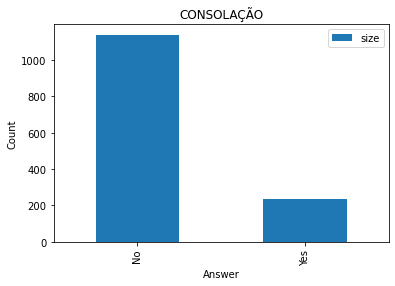

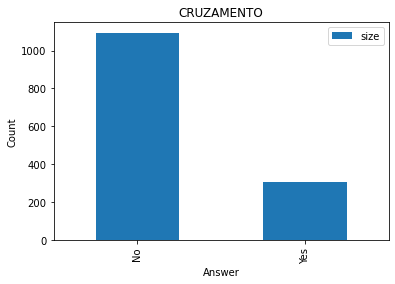

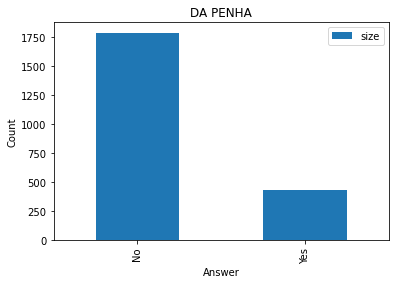

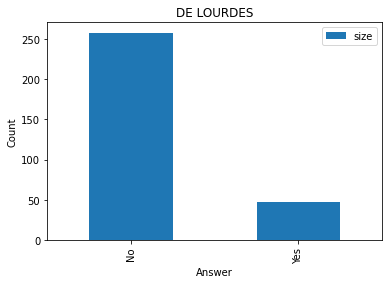

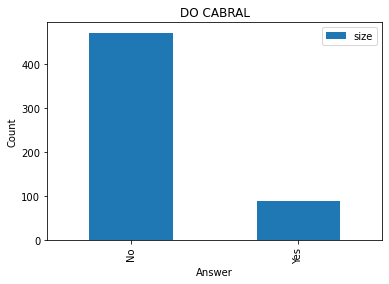

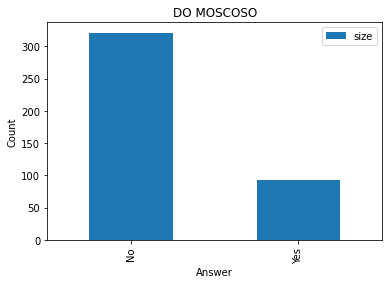

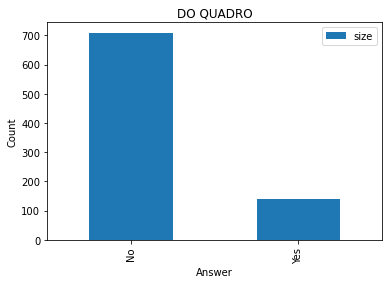

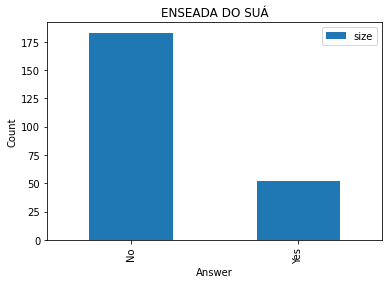

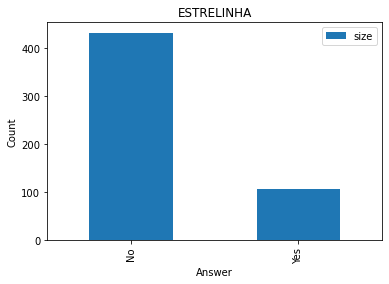

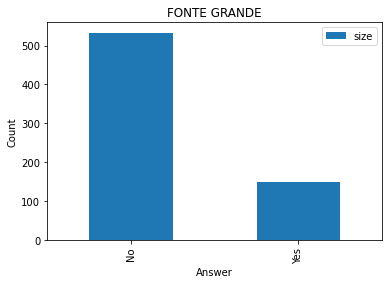

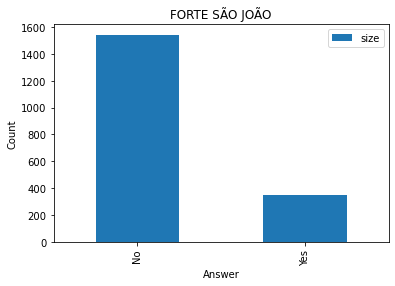

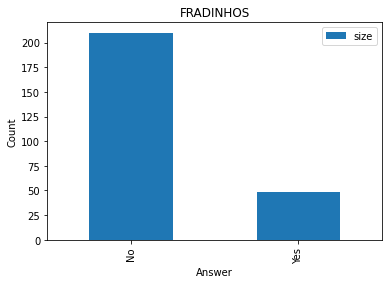

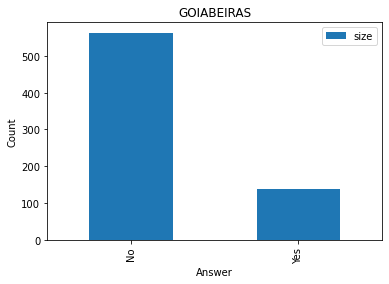

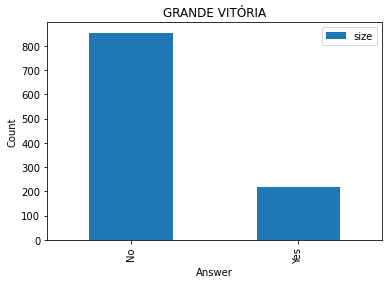

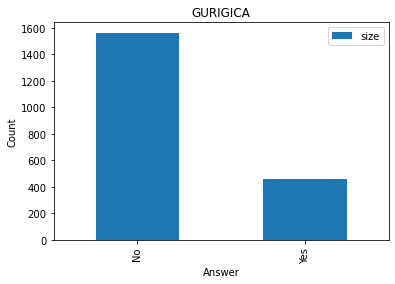

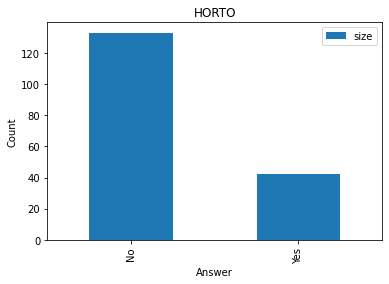

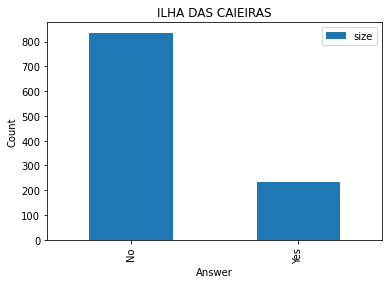

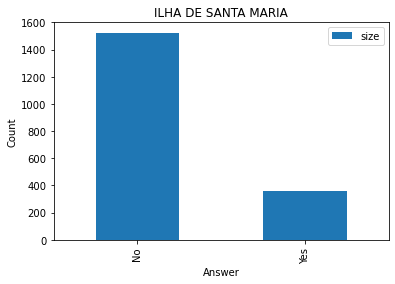

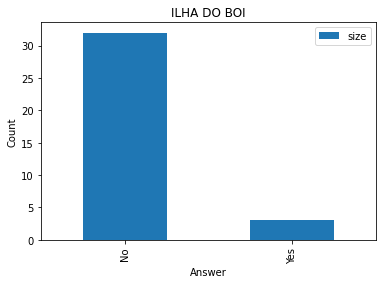

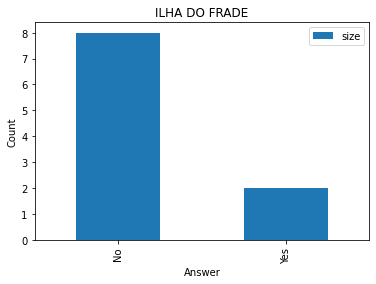

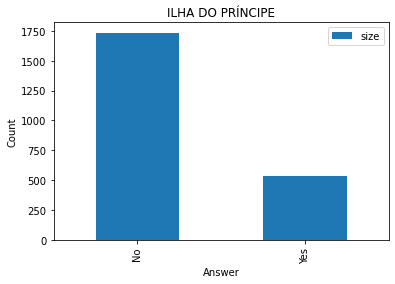

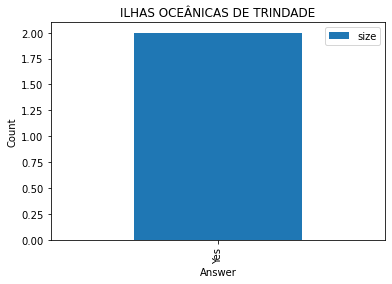

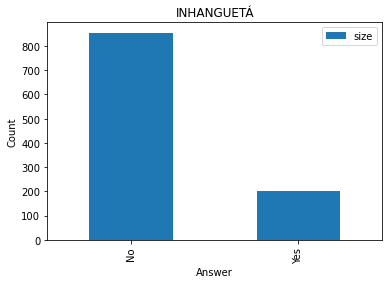

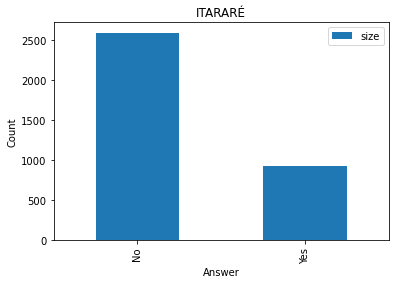

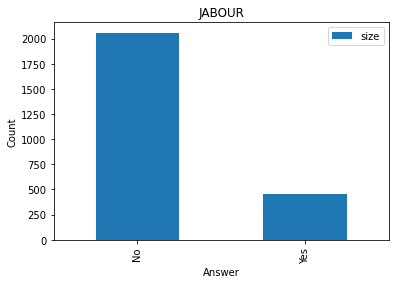

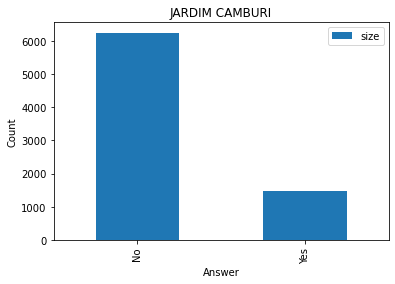

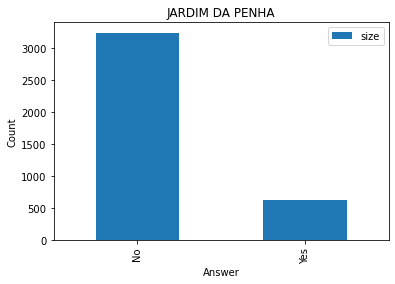

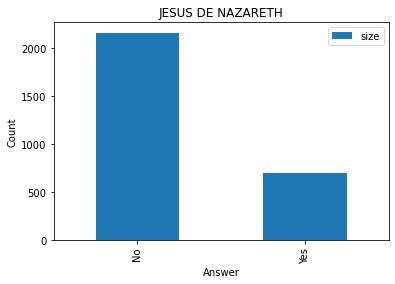

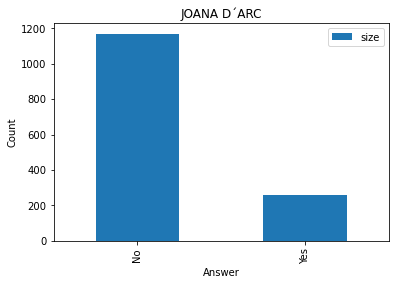

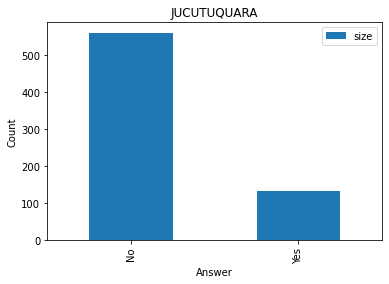

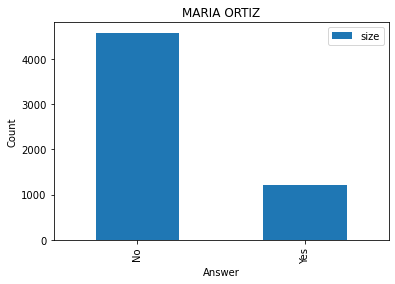

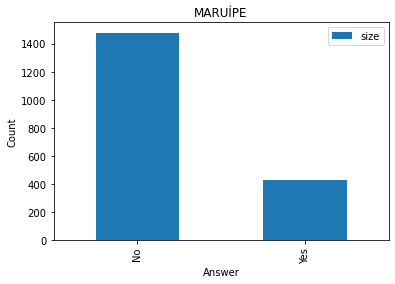

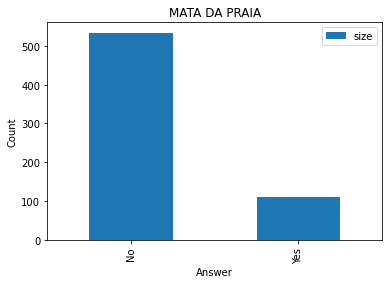

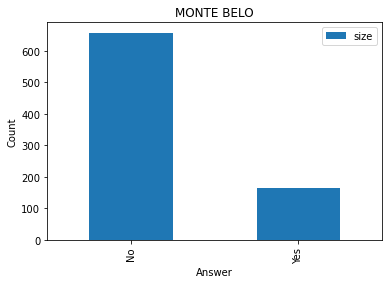

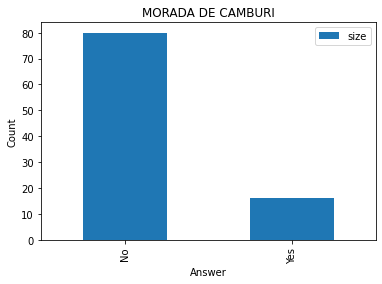

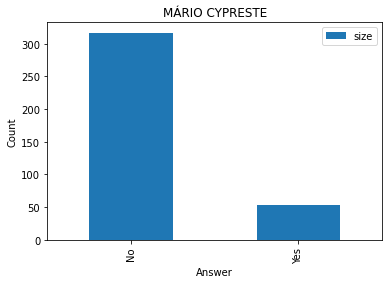

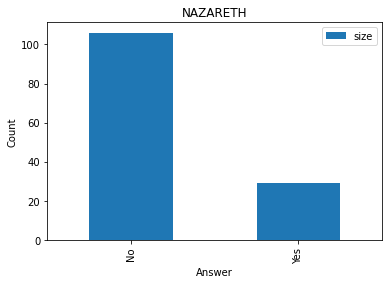

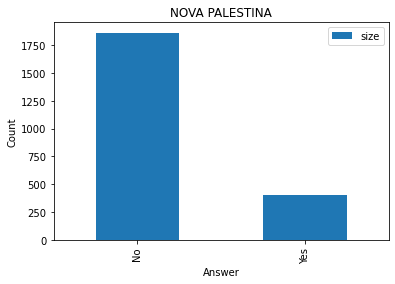

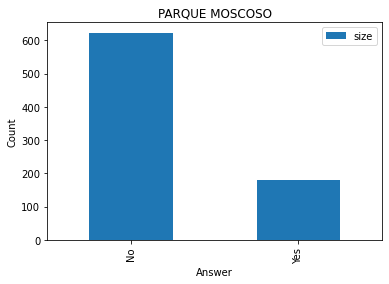

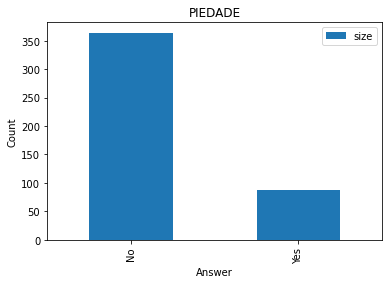

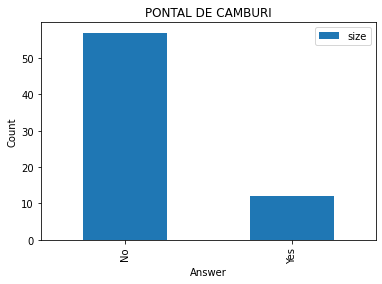

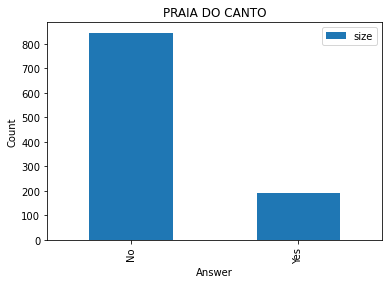

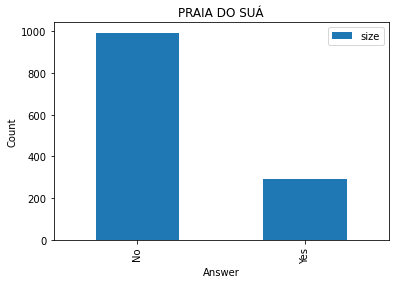

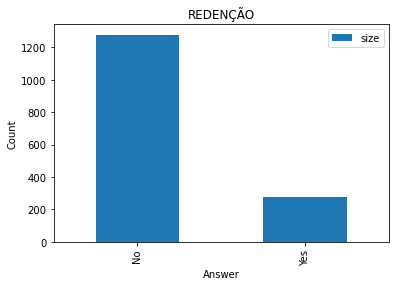

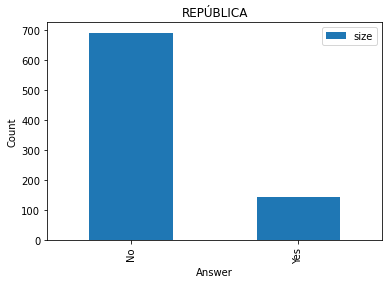

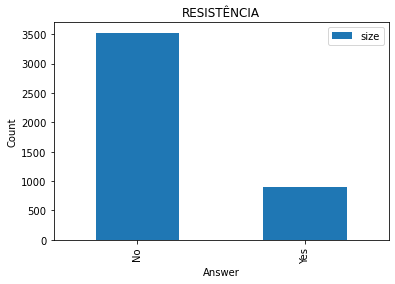

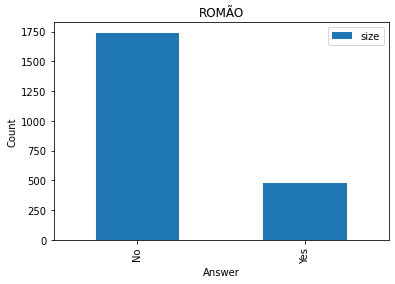

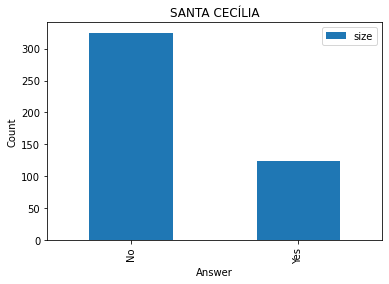

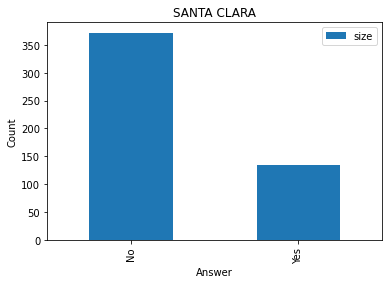

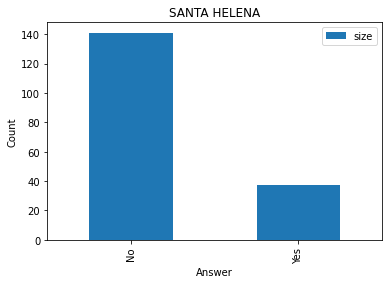

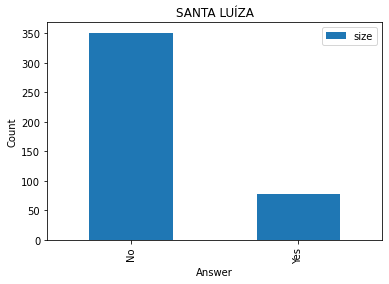

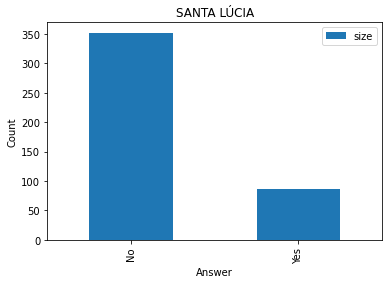

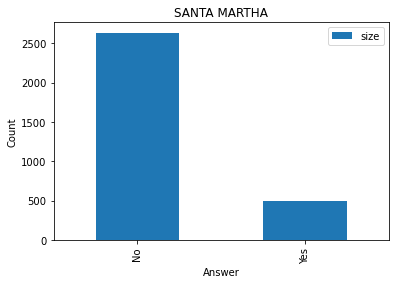

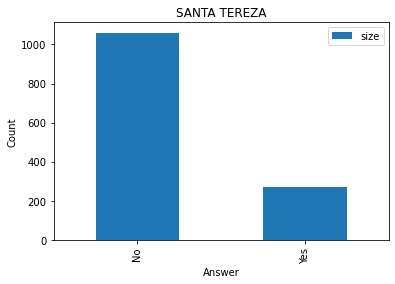

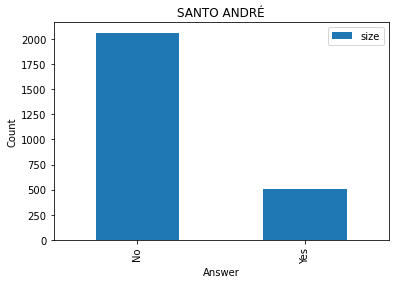

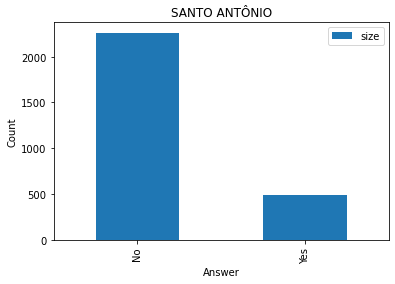

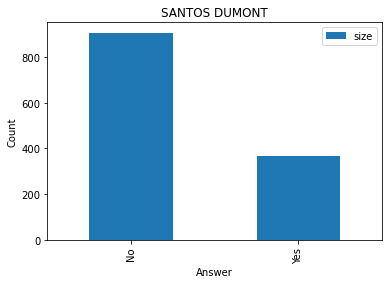

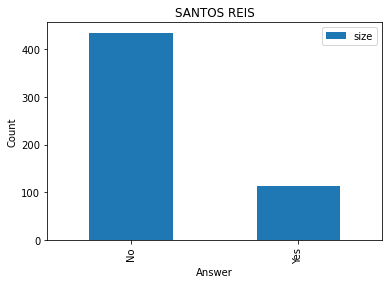

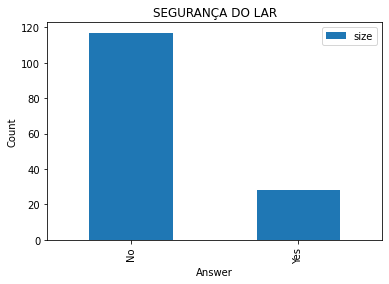

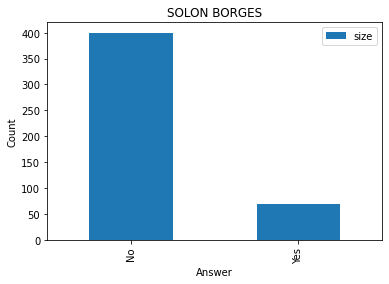

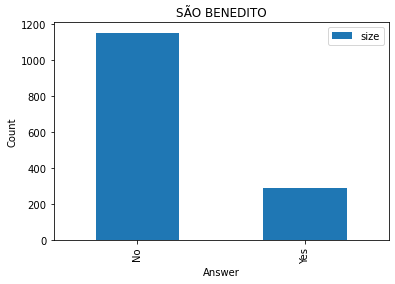

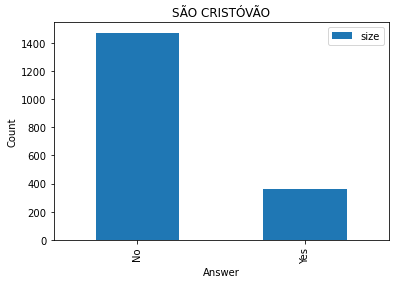

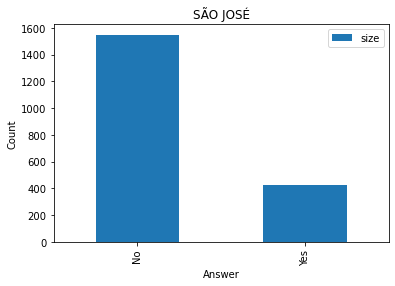

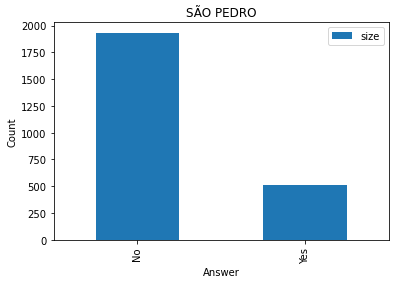

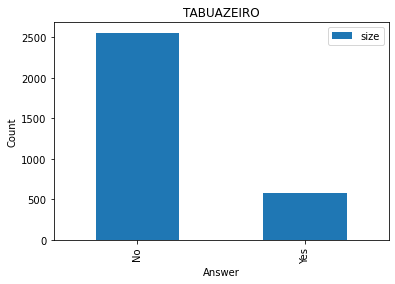

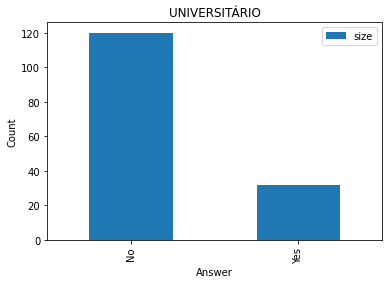

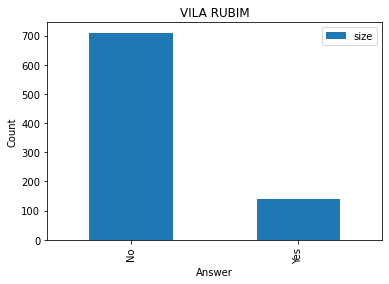

In [39]:
def bar_chart2(dataframe, x_axis, y_axis, titl, xlab, ylab):
    dataframe.plot(x=x_axis, y=y_axis, kind="bar", title=titl,xlabel=xlab, ylabel=ylab);
for i in range(80):
    index = i*2
    df_neighbourhood = df_patient_count1[df_patient_count1['neighbourhood'] == df_patient_count1['neighbourhood'][index]]
    bar_chart2(df_neighbourhood, "no_show","size",df_patient_count1['neighbourhood'][index],"Answer","Count")

All Neighbourhood hospital have majority of their patients keeping to their appointment except one of the neighbourhood hospitals -  ILHAS OCEANICAS DE TRINDADE.

### Which Neighbourhood has none of the patients keeping to their appointment?
Above we can see the answer from the list of bar charts that it is neighbourhood ILHAS OCEANICAS DE TRINDADE. More work can be done to find out what is specific about the neighbourhood hospital that no patient showed up for their appointment.

### What gender of patients kept to their appointment most?

We still use the group_by function to sieve out the data in a dataframe and then create the visualization.

In [40]:
df_patient_count2 = df_new.groupby(['gender','no_show'], as_index=False)["patient_id"].size()
df_patient_count2.head(40)

,gender,no_show,size
0,F,No,57246
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


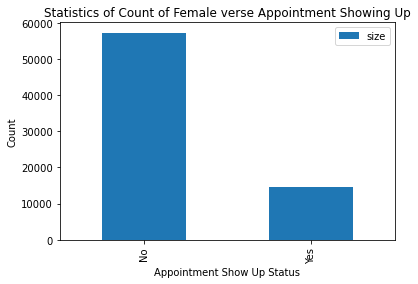

In [42]:
df_gender = df_patient_count2[df_patient_count2['gender'] == 'F']
bar_chart2(df_gender, "no_show", "size", "Statistics of Count of Female verse Appointment Showing Up", "Appointment Show Up Status", "Count")

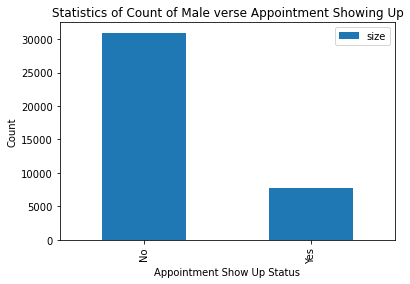

In [43]:
df_gender = df_patient_count2[df_patient_count2['gender'] == 'M']
bar_chart2(df_gender, "no_show", "size", "Statistics of Count of Male verse Appointment Showing Up", "Appointment Show Up Status", "Count")

It is observed the number of female patients is greater than the number of male patients and over 50,000 female patients keep to their appointment while just 30,000 plus male patients keep to their appointment.

### Population of female patients compared to male patients which is greater?
The visualization above can serve for an answer to this question. 

### Are patients on Brasilian Welfare Programme (Bolsa Familia) keeping to their appointment more than patients who aren't on the welfare programe?

We will still make use of the groupby function to find a sub dataframe from our df_new dataframe.

In [44]:
df_patient_count3 = df_new.groupby(["scholarship", "no_show"], as_index=False)["patient_id"].size()
df_patient_count3.head()

,scholarship,no_show,size
0,0,No,79925
1,0,Yes,19741
2,1,No,8283
3,1,Yes,2578


Above scholarship value '0' means patients not on the welfare programme and scholarship value '1' means patients on the welfare programme. Next, we create a plot to help with visualization of the result.

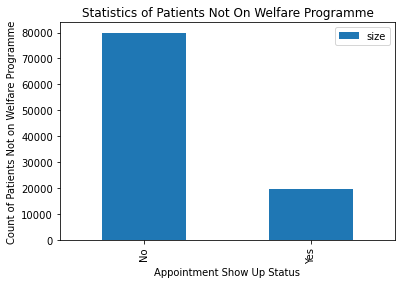

In [45]:
df_scholarship = df_patient_count3[df_patient_count3['scholarship'] == 0]
bar_chart2(df_scholarship, "no_show", "size", "Statistics of Patients Not On Welfare Programme", "Appointment Show Up Status", "Count of Patients Not on Welfare Programme")


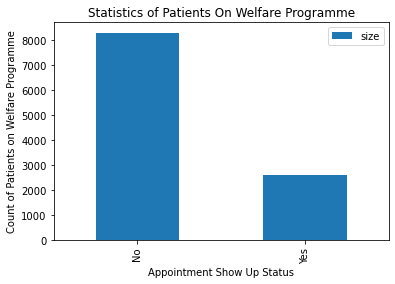

In [46]:
df_scholarship = df_patient_count3[df_patient_count3['scholarship'] == 1]
bar_chart2(df_scholarship, "no_show", "size", "Statistics of Patients On Welfare Programme", "Appointment Show Up Status", "Count of Patients on Welfare Programme")

The Bolsa Familia programme is not necessarily a factor that spurs Brazillians to keep to their appointment. Majority not on the programme keep to their appointment.

### Does the hipertension, diabetes and alcoholism status of patients affect their keeping to their appointments?
We answer the question individually for hipertension, diabetes and alcoholism.

In [47]:
df_patient_counthiper = df_new.groupby(["hipertension","no_show"], as_index=False)["patient_id"].size()
df_patient_counthiper.head()

,hipertension,no_show,size
0,0,No,70179
1,0,Yes,18547
2,1,No,18029
3,1,Yes,3772


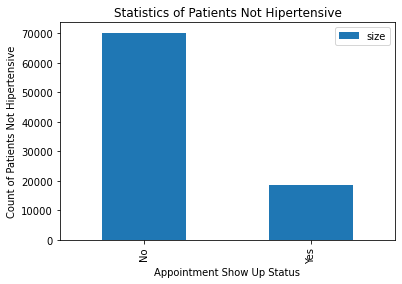

In [48]:
df_hiper = df_patient_counthiper[df_patient_counthiper['hipertension'] == 0]
bar_chart2(df_hiper, "no_show", "size", "Statistics of Patients Not Hipertensive", "Appointment Show Up Status", "Count of Patients Not Hipertensive")

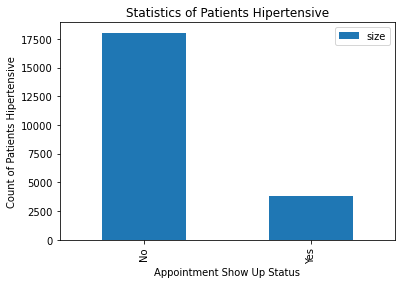

In [49]:
df_hiper = df_patient_counthiper[df_patient_counthiper['hipertension'] == 1]
bar_chart2(df_hiper, "no_show", "size", "Statistics of Patients Hipertensive", "Appointment Show Up Status", "Count of Patients Hipertensive")


Large population of patients not hypertensive keep to their appointment close to 70,000 patients while just 17,500 patients who aren't hypertensive keep to their appointment.

In [50]:
df_patient_countdia = df_new.groupby(["diabetes","no_show"], as_index=False)["patient_id"].size()
df_patient_countdia.head()

,diabetes,no_show,size
0,0,No,81695
1,0,Yes,20889
2,1,No,6513
3,1,Yes,1430


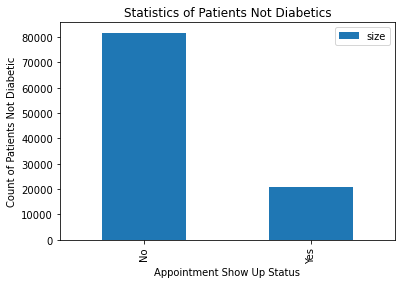

In [51]:
df_dia = df_patient_countdia[df_patient_countdia['diabetes'] == 0]
bar_chart2(df_dia, "no_show", "size", "Statistics of Patients Not Diabetics", "Appointment Show Up Status", "Count of Patients Not Diabetic")

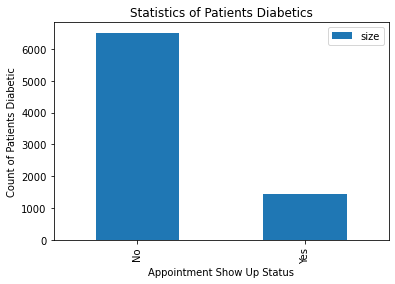

In [52]:
df_dia = df_patient_countdia[df_patient_countdia['diabetes'] == 1]
bar_chart2(df_dia, "no_show", "size", "Statistics of Patients Diabetics", "Appointment Show Up Status", "Count of Patients Diabetic")

Up to 80,000 patients who aren't diabetic keep to their appointment while just 6000 plut who are diabetic keep to their appointment.

In [53]:
df_patient_countalco = df_new.groupby(["alcoholism","no_show"], as_index=False)["patient_id"].size()
df_patient_countalco.head()

,alcoholism,no_show,size
0,0,No,85525
1,0,Yes,21642
2,1,No,2683
3,1,Yes,677


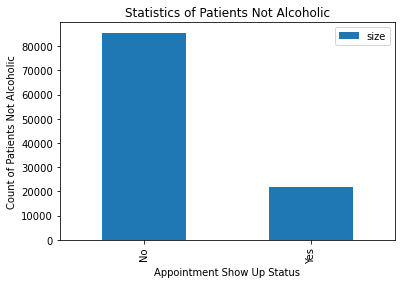

In [54]:
df_alco = df_patient_countalco[df_patient_countalco['alcoholism'] == 0]
bar_chart2(df_alco, "no_show", "size", "Statistics of Patients Not Alcoholic", "Appointment Show Up Status", "Count of Patients Not Alcoholic")

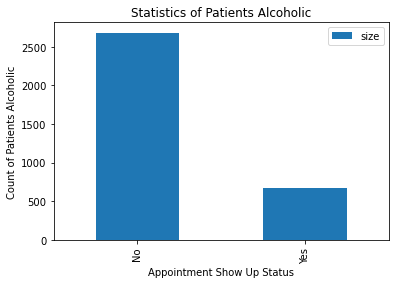

In [55]:
df_alco = df_patient_countalco[df_patient_countalco['alcoholism'] == 1]
bar_chart2(df_alco, "no_show", "size", "Statistics of Patients Alcoholic", "Appointment Show Up Status", "Count of Patients Alcoholic")

Brazillians are not alcoholics, because we have more than 80,000 non-alcoholics keeping to their appointment and just 2,500 alcoholics keeping to their appointment.

<a id='limitation_of_study'></a>

## Limitation of Study

The study did not consider the appointment date and scheduled date as factors which could encourage or discourage a patient in keeping to their appointment. Future studies can incorporate that.

<a id='conclusions'></a>
## Conclusions

From the statistical analysis, we observed the following:

1. That despite the fact that many Brazillians are not on the Brasilian Welfare Program, many of them keep to their hospital appointment. 
2. Also, many do not get sms about their appointment and they still keep to their appointment.
3. Population of Male patients is lower than the population of female patients.
4. Neighbourhood ILHAS OCEANICAS DE has none of her patients showing up for their appointment.
5. Female patients are greater than male patients.
6. Female patients show up for their appointment more than male patients.
7. Many Brazillians are not on the Bolsa Familia programme but yet a large number of them show up for their medical appointments.
8. The number of patients hipertensive showing up for the appointment is greater than the number of patients who aren't that are showing up for their appointment.
9. A large number of patients are not diabetic and patients who aren't diabetic were showing up for appointment more than those who are diabetic.
10. Alcoholism does not really prevent Brazilians from showing up for their appointments.
11. A large number of Brazilians are not alcoholic.